In [533]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [534]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [535]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [536]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    #'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [537]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

In [538]:

dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')

original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'kp', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'score', 'almostRatio'] = '-'

# original_df.to_csv('original_df.csv')


100%|██████████| 130/130 [00:03<00:00, 42.71it/s]


In [539]:
# original_df = pd.read_csv('original_df.csv')
print(set(original_df['objective']))

{'knowledge', '-', 'score'}


In [540]:
set(original_df['playerDepth'])


{'-', '1', '2', '3'}

In [541]:
original_df.head()


,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,ReachedKnowledgeStep,Q1ReachedKnowledgeStep,...,Target_BombPiece,Target_RainbowPiece,method,player,simpleEffect,objective,simulation,playerDepth,almostRatio,Sum_Matched
0,1,200,2023-05-26 07:50:40.305,a60700ee,0,251,0.993750,0.681110,83,29,...,2,3,mcts,0,1,score,1000,1,-,492
1,2,200,2023-05-26 07:54:42.656,a60700ee,0,256,1.036254,0.745827,119,35,...,2,3,mcts,0,1,score,1000,1,-,294
2,3,200,2023-05-26 07:58:55.023,a60700ee,0,268,1.094675,0.776071,19,4,...,2,3,mcts,0,1,score,1000,1,-,360
3,4,200,2023-05-26 08:03:27.655,a60700ee,0,306,1.188011,0.782366,86,11,...,2,3,mcts,0,1,score,1000,1,-,462
4,5,200,2023-05-26 08:08:21.882,a60700ee,0,243,1.015290,0.777213,32,22,...,2,3,mcts,0,1,score,1000,1,-,342


In [542]:
original_df.columns.values.tolist()

['EpisodeCount',
 'StepCount',
 'Time',
 'InstanceUUID',
 'SettleCount',
 'ChangedCount',
 'MeanComparisonCount',
 'StdComparisonCount',
 'ReachedKnowledgeStep',
 'Q1ReachedKnowledgeStep',
 'Q2ReachedKnowledgeStep',
 'Q3ReachedKnowledgeStep',
 'Matched_HorizontalPiece',
 'Matched_VerticalPiece',
 'Matched_CrossPiece',
 'Matched_RocketPiece',
 'Matched_BombPiece',
 'Matched_RainbowPiece',
 'Target_HorizontalPiece',
 'Target_VerticalPiece',
 'Target_CrossPiece',
 'Target_RocketPiece',
 'Target_BombPiece',
 'Target_RainbowPiece',
 'method',
 'player',
 'simpleEffect',
 'objective',
 'simulation',
 'playerDepth',
 'almostRatio',
 'Sum_Matched']

In [543]:
pd.set_option('display.max_rows', None)
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          500   
                                                200           500   
                        3           -           100           500   
                                                1000          500   
                                                200           500   
       random -         -           -           -             500   
1      mcts   knowledge 1           1.0         100            25   
                                                1000           25   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          500   
                                                200           500   
                        3           -           100           500   
                                                1000          500   
                                                200           500   
       random -         -           -           -             500   
10     mcts   knowledge 1           1.0         100            24   
                                                1000           26   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          500   
                                                200           500   
                        3           -           100           500   
                                                1000          500   
                                                200           500   
       random -         -           -           -             500   
2      mcts   knowledge 1           1.0         100            23   
                                                1000           23   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          500   
                                                200           500   
                        3           -           100           500   
                                                1000          500   
                                                200           500   
       random -         -           -           -             500   
3      mcts   knowledge 1           1.0         100            29   
                                                1000           22   
              score     1           -           100           500   
                                                1000          500   
                                                200           500   
                        2           -           100           500   
                                                1000          500   
                                                200           500   
                        3           -           100           500   
                                                1000     

In [544]:
original_df['ReachedKnowledgeStep'] = original_df['ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q1ReachedKnowledgeStep'] = original_df['Q1ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q2ReachedKnowledgeStep'] = original_df['Q2ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q3ReachedKnowledgeStep'] = original_df['Q3ReachedKnowledgeStep'].replace(-1, 200)

for i in range(5):
    original_df['playerDepth'] = original_df['playerDepth'].replace(str(i), i)
for i in range(100, 1000, 100):
    original_df['simulation'] = original_df['simulation'].replace(str(i), i)

In [545]:
pd.set_option('display.max_rows', None)
match_result = original_df.groupby(['method', 'objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


method Q1ReachedKnowledgeStep  \
                                         count                   mean   
method objective playerDepth simulation                                 
mcts   knowledge 1           100           252              47.730159   
                             1000          234              40.786325   
       score     1           100          5500              47.114545   
                             200          5500              45.144909   
                             1000         5500              43.157818   
                 2           100          5500              46.069636   
                             200          5500              44.336909   
                             1000         5500              43.613818   
                 3           100          5500              48.942364   
                             200          5500              45.222909   
                             1000         5500              42.680727   
random -         -           -            5500              78.032909   

                                        Q2ReachedKnowledgeStep  \
                                                          mean   
method objective playerDepth simulation                          
mcts   knowledge 1           100                     57.329365   
                             1000                    49.636752   
       score     1           100                     57.905818   
                             200                     55.174364   
                             1000                    52.946909   
                 2           100                     55.904727   
                             200                     53.437455   
                             1000                    51.872182   
                 3           100                     59.240182   
                             200                     54.240909   
                             1000                    50.418182   
random -         -           -                       93.037636   

                                        Q3ReachedKnowledgeStep  \
                                                          mean   
method objective playerDepth simulation                          
mcts   knowledge 1           100                     73.841270   
                             1000                    64.354701   
       score     1           100                     76.162545   
                             200                     71.872909   
                             1000                    69.301455   
                 2           100                     72.684727   
                             200                     68.544000   
                             1000                    66.268000   
                 3           100                     76.274727   
                             200                     70.129455   
                             1000                    64.030364   
random -         -           -                      116.757455   

                                        ReachedKnowledgeStep  \
                                                        mean   
method objective playerDepth simulation                        
mcts   knowledge 1           100                   79.349206   
                             1000                  69.273504   
       score     1           100                   82.098909   
                             200                   77.847818   
                             1000                  74.821455   
                 2           100                   78.356000   
                             200                   73.968727   
                             1000                  71.320909   
                 3           100                   82.724545   
                             200                   75.430545   
                             1000                  69.148182   
random -         -           -                    123.642000   

 

In [546]:
pd.set_option('display.max_rows', None)


match_result = original_df.copy()
match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
match_result = match_result[~match_result['playerDepth'].isin([2, 3])]
# match_result = match_result[~match_result['simulation'].isin([100, 400])]

# print(set(match_result['playerDepth']))
pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'simpleEffect','objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == "":


method  \
                                                      count   
method simpleEffect objective playerDepth simulation          
mcts   1            knowledge 1           100           252   
                                          1000          234   
                    score     1           100          5500   
                                          200          5500   
                                          1000         5500   
random 1            -         -           -            5500   

                                                     Q1ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     47.730159   
                                          1000                    40.786325   
                    score     1           100                     47.114545   
                                          200                     45.144909   
                                          1000                    43.157818   
random 1            -         -           -                       78.032909   

                                                     Q2ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     57.329365   
                                          1000                    49.636752   
                    score     1           100                     57.905818   
                                          200                     55.174364   
                                          1000                    52.946909   
random 1            -         -           -                       93.037636   

                                                     Q3ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     73.841270   
                                          1000                    64.354701   
                    score     1           100                     76.162545   
                                          200                     71.872909   
                                          1000                    69.301455   
random 1            -         -           -                      116.757455   

                                                     ReachedKnowledgeStep  \
                                                                     mean   
method simpleEffect objective playerDepth simulation                        
mcts   1            knowledge 1           100                   79.349206   
                                          1000                  69.273504   
                    score     1           100                   82.098909   
                                          200                   77.847818   
                                          1000                  74.821455   
random 1            -         -           -                    123.642000   

                                                     Matched_HorizontalPiece  \
                                                                        mean   
method simpleEffect objective playerDepth simulation                           
mcts   1            knowledge 1           100                      42.916667   
                                          1000                     44.841880   
                    score     1           100                      65.394909   
                                          200                      68.094000   
                                          1000                     71.845091   
random 1       

In [547]:
# Drop outliers
# pd.set_option('display.max_rows', None)


match_result = original_df.copy()

match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
match_result = match_result[~match_result['playerDepth'].isin([2, 3])]
# match_result = match_result[~match_result['playerDepth'].isin([2])]
# match_result = match_result[~match_result['simulation'].isin([100, 400])]

# Define the function to identify and remove outliers
def remove_outliers(column):
    # Calculate the z-score for the column
    z_scores = (column - column.mean()) / column.std()

    # Define the threshold for outliers (e.g., z-score > 3 or z-score < -3)
    threshold = 2
    # Return the column without the outliers
    column[~(z_scores > -threshold)] = -9999
    column[~(z_scores < threshold)] = -9999

    return column


columns_to_remove_outliers = ['Q1ReachedKnowledgeStep',
                              'Q2ReachedKnowledgeStep',
                              'Q3ReachedKnowledgeStep',
                              'ReachedKnowledgeStep',
                            ]

for column in columns_to_remove_outliers:
    match_result[column] = match_result.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation'])[column].transform(remove_outliers)
    match_result = match_result[match_result[column] != -9999]

match_result_noout = match_result.copy()
print(match_result_noout.columns)
# print(set(match_result['playerDepth']))
# pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'simpleEffect','objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result.to_latex('model.tex')
match_result

Index(['EpisodeCount', 'StepCount', 'Time', 'InstanceUUID', 'SettleCount',
       'ChangedCount', 'MeanComparisonCount', 'StdComparisonCount',
       'ReachedKnowledgeStep', 'Q1ReachedKnowledgeStep',
       'Q2ReachedKnowledgeStep', 'Q3ReachedKnowledgeStep',
       'Matched_HorizontalPiece', 'Matched_VerticalPiece',
       'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece',
       'Matched_RainbowPiece', 'Target_HorizontalPiece',
       'Target_VerticalPiece', 'Target_CrossPiece', 'Target_RocketPiece',
       'Target_BombPiece', 'Target_RainbowPiece', 'method', 'player',
       'simpleEffect', 'objective', 'simulation', 'playerDepth', 'almostRatio',
       'Sum_Matched'],
      dtype='object')


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


method  \
                                                      count   
method simpleEffect objective playerDepth simulation          
mcts   1            knowledge 1           100           210   
                                          1000          204   
                    score     1           100          4627   
                                          200          4638   
                                          1000         4670   
random 1            -         -           -            4901   

                                                     Q1ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     37.904762   
                                          1000                    34.318627   
                    score     1           100                     40.180463   
                                          200                     38.492022   
                                          1000                    36.842398   
random 1            -         -           -                       68.554377   

                                                     Q2ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     44.585714   
                                          1000                    40.348039   
                    score     1           100                     47.687054   
                                          200                     45.649418   
                                          1000                    43.984582   
random 1            -         -           -                       80.708223   

                                                     Q3ReachedKnowledgeStep  \
                                                                       mean   
method simpleEffect objective playerDepth simulation                          
mcts   1            knowledge 1           100                     54.152381   
                                          1000                    51.098039   
                    score     1           100                     62.514804   
                                          200                     59.152868   
                                          1000                    57.321627   
random 1            -         -           -                      107.124056   

                                                     ReachedKnowledgeStep  \
                                                                     mean   
method simpleEffect objective playerDepth simulation                        
mcts   1            knowledge 1           100                   58.152381   
                                          1000                  54.313725   
                    score     1           100                   67.014912   
                                          200                   63.800129   
                                          1000                  61.482441   
random 1            -         -           -                    114.829219   

                                                     Matched_HorizontalPiece  \
                                                                        mean   
method simpleEffect objective playerDepth simulation                           
mcts   1            knowledge 1           100                      46.119048   
                                          1000                     46.426471   
                    score     1           100                      65.451264   
                                          200                      68.401682   
                                          1000                     72.327623   
random 1       

Index(['EpisodeCount', 'StepCount', 'Time', 'InstanceUUID', 'SettleCount',
       'ChangedCount', 'MeanComparisonCount', 'StdComparisonCount',
       'ReachedKnowledgeStep', 'Q1ReachedKnowledgeStep',
       'Q2ReachedKnowledgeStep', 'Q3ReachedKnowledgeStep',
       'Matched_HorizontalPiece', 'Matched_VerticalPiece',
       'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece',
       'Matched_RainbowPiece', 'Target_HorizontalPiece',
       'Target_VerticalPiece', 'Target_CrossPiece', 'Target_RocketPiece',
       'Target_BombPiece', 'Target_RainbowPiece', 'method', 'player',
       'simpleEffect', 'objective', 'simulation', 'playerDepth', 'almostRatio',
       'Sum_Matched'],
      dtype='object')


<AxesSubplot:>

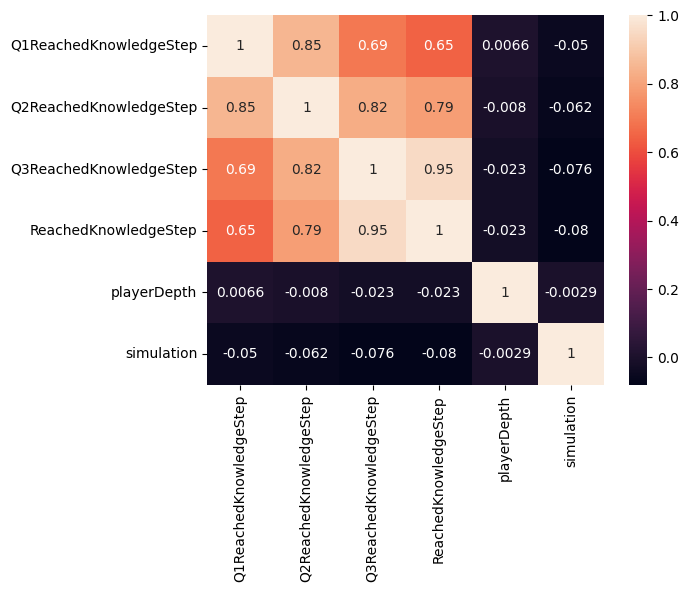

In [548]:
match_result = original_df.copy()

match_result['objective'] = pd.to_numeric(match_result['objective'], errors='coerce')
match_result['playerDepth'] = pd.to_numeric(match_result['playerDepth'], errors='coerce')
match_result['simulation'] = pd.to_numeric(match_result['simulation'], errors='coerce')


print(original_df.keys())
corr_df = match_result[['Q1ReachedKnowledgeStep',
             'Q2ReachedKnowledgeStep',
             'Q3ReachedKnowledgeStep',
             'ReachedKnowledgeStep',
             'playerDepth',
             'simulation']].corr()
# plot the heatmap
sns.heatmap(corr_df, annot=True)

In [549]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'kp':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
    else:
        return f"{x['method']}"

In [550]:
melted_df = match_result_noout.copy()

melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation', 'player']).sample(n=100, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random',
                                                       'mcts_knowledge_1.0_400_1',
                                                       'mcts_knowledge_0.75_400_1',
                                                       'mcts_knowledge_1.0_400_2',
                                                       'mcts_knowledge_0.75_400_2',
                                                       'mcts_score_400_2'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
# melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')	125.0
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="player", data=melted_df)
plt.xticks(rotation=45)

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
for player_no in range(0, 4):
    player_df = match_result_noout[match_result_noout['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

In [ ]:
player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = [
'25', '50', '75', '100',
# Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
]

# print(player_df.keys())
sns.set_palette('Set2')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=400, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Required Steps for Learning Skill (Player: All)')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.savefig(f'./figures/learning_steps_pA', dpi=300)
plt.show()



In [ ]:
for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75',
        'Matched_HorizontalPiece':'Horizon',
        'Matched_VerticalPiece':'Vertical',
        'Matched_CrossPiece':'Cross',
        'Matched_RocketPiece':'Rocket',
        'Matched_BombPiece':'Bomb',
        'Matched_RainbowPiece':'Rainbow',

    }, inplace=True)

    _columns = [
    # '25', '50', '75', '100',
    'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
    ]

    # print(player_df.keys())
    sns.set_palette('Set3')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=False)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_kp_-_400_2',
        'mcts_knowledge_1.0_400_2',
        'mcts_score_400_2',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Matched Blocks (Player: {player_no})')
    ax.set_xlabel('Block Type')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.savefig(f'./figures/block_counts_p{player_no}', dpi=300)
    plt.show()

In [ ]:

player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75',
    'Matched_HorizontalPiece':'Horizon',
    'Matched_VerticalPiece':'Vertical',
    'Matched_CrossPiece':'Cross',
    'Matched_RocketPiece':'Rocket',
    'Matched_BombPiece':'Bomb',
    'Matched_RainbowPiece':'Rainbow',

}, inplace=True)

_columns = [
# '25', '50', '75', '100',
'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
]

# print(player_df.keys())
sns.set_palette('Set3')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_knowledge_1.0_200_1',
    'mcts_knowledge_1.0_1000_3',
    'mcts_score_200_1',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Matched Blocks (Player: All)')
ax.set_xlabel('Block Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'./figures/block_counts_pA', dpi=300)
plt.show()

In [ ]:

for player_no in range(0, 4):

    player_df = match_result_noout[match_result_noout['player'] == str(player_no)]

    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=False)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    pprint(set(melted_df['concat_method']))
    _methods = [
        'mcts_knowledge_1.0_200_1',
        'mcts_knowledge_1.0_1000_3',
        'mcts_score_200_1',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    # plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

In [ ]:



player_df = match_result_noout.copy()

melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = [
'25', '50', '75', '100',
# Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
]

# print(player_df.keys())
sns.set_palette('Set2')
melted_df = melted_df.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=False)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_knowledge_1.0_200_1',
    'mcts_knowledge_1.0_1000_3',
    'mcts_score_200_1',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
# plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
plt.show()


In [ ]:



player_df = original_df.copy()
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75',
    'Matched_HorizontalPiece':'Horizon',
    'Matched_VerticalPiece':'Vertical',
    'Matched_CrossPiece':'Cross',
    'Matched_RocketPiece':'Rocket',
    'Matched_BombPiece':'Bomb',
    'Matched_RainbowPiece':'Rainbow',

}, inplace=True)

_columns = [
# '25', '50', '75', '100',
'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
]

# print(player_df.keys())
sns.set_palette('Set3')
melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=500, random_state=1, replace=True)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*_columns], ignore_index=False)
# pprint(set(melted_df['concat_method']))
_methods = [
    'mcts_kp_-_400_2',
    'mcts_knowledge_1.0_400_2',
    'mcts_score_400_2',
    'random'
]
melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

plt.figure(figsize=(5, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

plt.legend(loc='upper left')
ax.set_title(f'Matched Blocks (Player: All)')
ax.set_xlabel('Block Type')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(f'./figures/block_counts_pA', dpi=300)
plt.show()
